## EVs (Electric vehicles market size)

#### OBJECTIVE
~ To get detailed insights and support decisions on new product launches, expansions, and investments.
~ it will help in predictive models like revenue projections and potential customer growth.
~ know how of customer segmentation and help in strategise effectively 

####  STEPS INVOLVED IN ANALYSIS
- Analysis scope
- Data sources
- Use historical data to identify trends in terms of production, sales and marketing
- analyse the market for potential growth rate
- provide recommendation whether to expand or enter into market 

In [139]:
### Fisrt step
## importing libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
## import data usind pandas 

ev = pd.read_csv('Electric_Vehicle_Population_Data.csv')
print(ev.head(5))

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [7]:
## Next step 
# Data Cleaning 

ev.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
ev.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [9]:
## let's drop null values

ev = ev.dropna()

In [10]:
## let's see see EVs adoption over time 
## analyse the growth of EV population by model year 

C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17268\974962195.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_adop_by_yr.index, y = ev_adop_by_yr.values, palette = 'viridis')


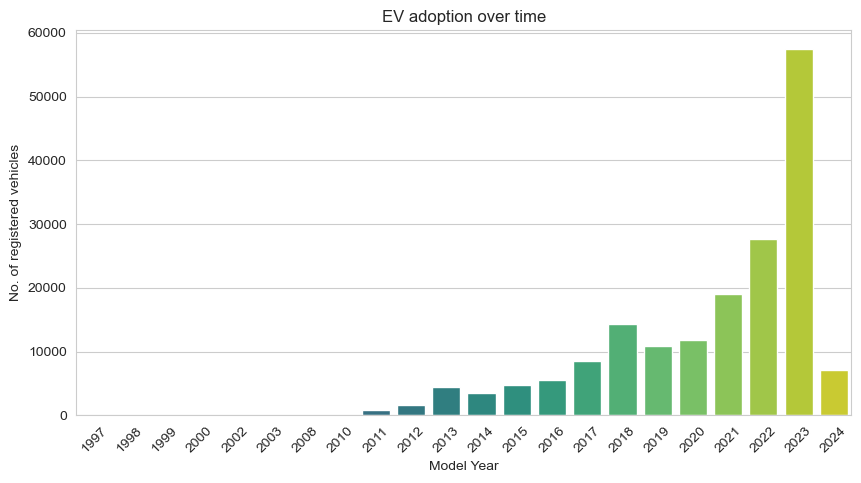

In [11]:
sns.set_style("whitegrid")

# EV adoption over Time
plt.figure(figsize=(10,5))
ev_adop_by_yr = ev['Model Year'].value_counts().sort_index()
sns.barplot(x = ev_adop_by_yr.index, y = ev_adop_by_yr.values, palette = 'viridis')
plt.xlabel('Model Year')
plt.ylabel('No. of registered vehicles')
plt.title('EV adoption over time')
plt.xticks(rotation = 45)
plt.show()


### Observation
- It is visible that EV adoption increased significantly in 2000s
- peaked in 2023
- consistently rising since 2017 onwards
  

In [13]:
## EV COUNTY (TOP 3 Cities ) 

In [14]:
ev_county = ev['County'].value_counts()
top_3_county = ev_county.head(3).index

In [15]:
top_3_county

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [16]:
## filtering top counties data country wise
top_counties = ev[ev['County'].isin(top_3_county)]

In [17]:
## data analysing distribution of these top counties within cities
ev_city_distribution = top_counties.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='No. of Vehicles')
top_cities = ev_city_distribution.head(10)

In [18]:
top_cities

,County,City,No. of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


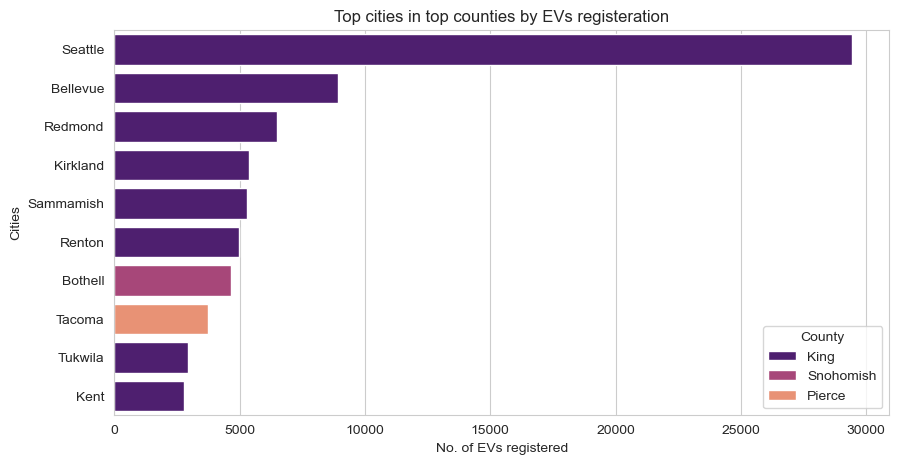

<Figure size 640x480 with 0 Axes>

In [19]:
## let's plot now

plt.figure(figsize=(10,5))
sns.barplot(x='No. of Vehicles', y='City', hue='County', data =top_cities, palette='magma' )
plt.xlabel('No. of EVs registered')
plt.ylabel('Cities')
plt.title('Top cities in top counties by EVs registeration')
plt.show()
plt.tight_layout()

## Observation
- As we can see above, Seattle city which is in King County has highest registration of EVs
- Bellevue and Redmond also has high number of EVs registerations and also in King County similar to Seattle
- Cities in Snohomish have moderate no. of registrations
- Cities in Pierce such as Tacoma has fewer registrations slightly more than Tukwila and Kent

  -- Overall Graph shows Each city doesn't have same number of registeration and among all 'King' County dominates all.

In [21]:
## EVs Types (Battery electric Vs Hybrid electric)

C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17268\745953390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = ev_type.index, x = ev_type.values, palette='rocket')


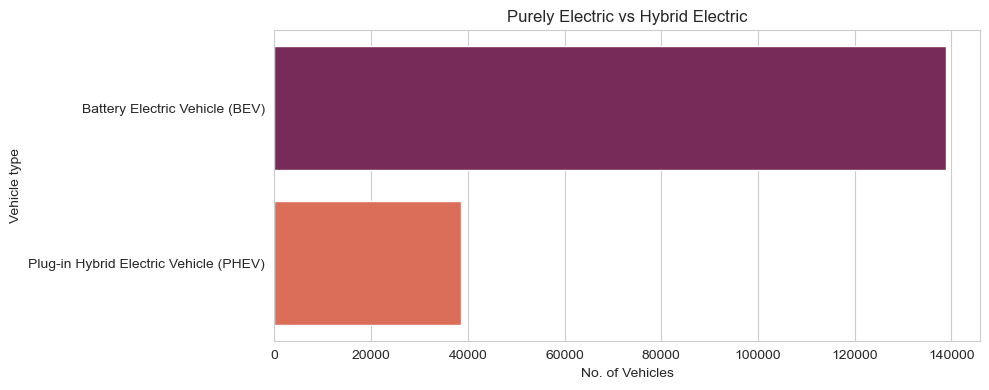

In [22]:
ev_type = ev['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(y = ev_type.index, x = ev_type.values, palette='rocket')
plt.title('Purely Electric vs Hybrid Electric')
plt.xlabel('No. of Vehicles')
plt.ylabel('Vehicle type')
plt.tight_layout()
plt.show()

## Observation
- As we noticed from above plotting, Battery Electric Vehicle(BEV) which are purely electric are in high demand as compared to hybrid electric.
- So, it indicates that if a company already in EV market they should go for BEV production more and if a company wants to enter EV market they should start from BEV as it is a potentially better investment withh more returns possibilty.

In [24]:
## MAKE AND MODEL POPULARITY
## Now let's see the Top manufacturers of EVs in USA

In [25]:
ev_top_mfg = ev['Make'].value_counts().head(10)

In [26]:
ev_top_mfg

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_17268\3332549605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_top_mfg.values, y=ev_top_mfg.index, palette='dark')


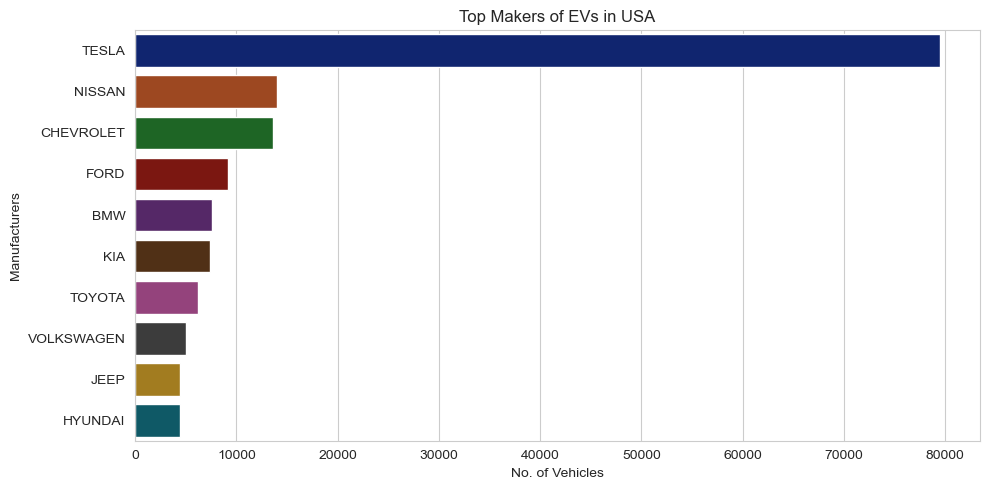

In [27]:
## let's visualise it

plt.figure(figsize=(10,5))
sns.barplot(x=ev_top_mfg.values, y=ev_top_mfg.index, palette='dark')
plt.title('Top Makers of EVs in USA')
plt.xlabel('No. of Vehicles')
plt.ylabel('Manufacturers')
plt.tight_layout()
plt.show()

## Observation
- TESLA leads the market with highest margin
- NISSAN AND CHEVROLET have almost similar Numbers
- FORD, BMW and KIA have moderate amount of sales
- JEEP and HYUNDAI follow decreasing trend 

In [29]:
## Let's find out the most popular models among top makers as well

top_3_makers = ev_top_mfg.head(3).index

## Popular Ev models among top 3 manufacturers
top_make = ev[ev['Make'].isin(top_3_makers)]

## Top 10 models among top 3 makers
top_models = top_make.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='No. of Vehicles')

In [30]:
top_models = top_models.head(10)

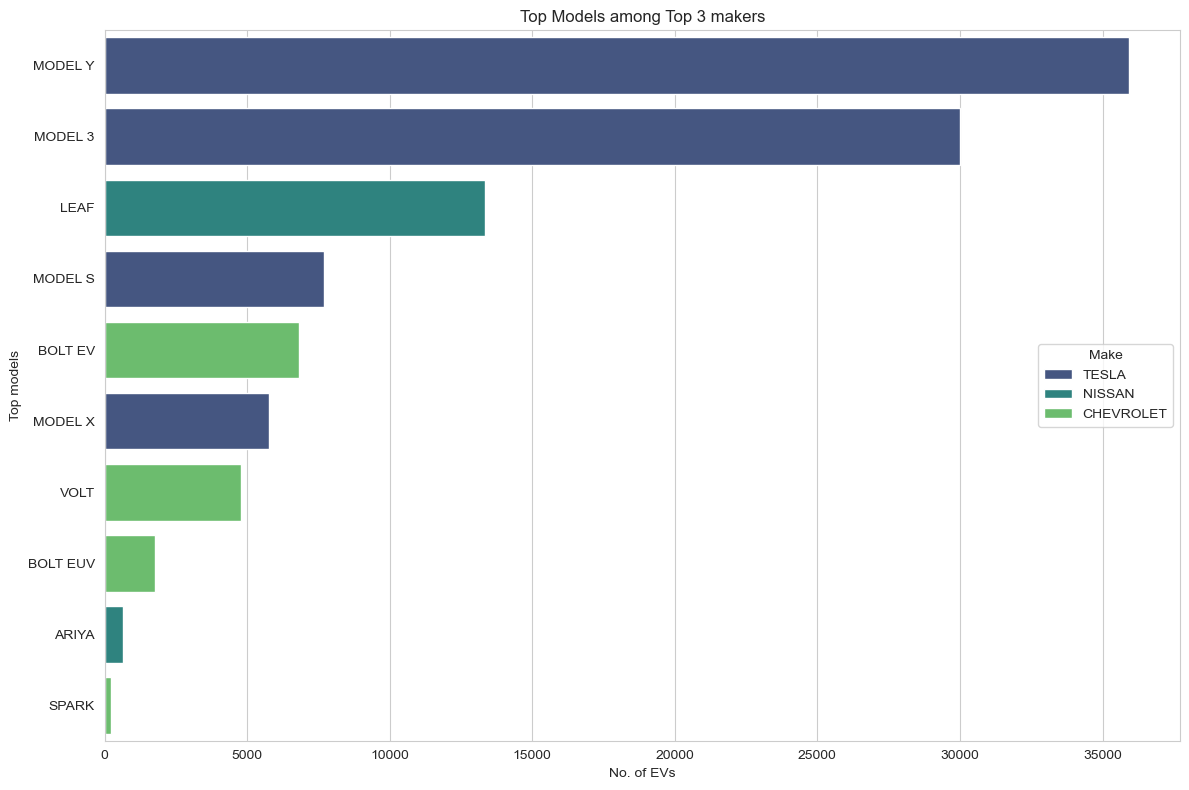

In [31]:
## plotting

plt.figure(figsize=(12,8))
sns.barplot(x='No. of Vehicles', y='Model', hue='Make', data=top_models,palette='viridis')
plt.title('Top Models among Top 3 makers')
plt.xlabel('No. of EVs')
plt.ylabel('Top models')
plt.legend(title='Make', loc = 'center right')
plt.tight_layout()
plt.show()

## Observation 
-  Among top 3 makers TESLA, NISSAN and CHEVROLET:
-  TESLA models tops the EVs list. This shows TESLA unwavering commitment to EVs sector and dominant .
-  TESLA's Model Y and Model 3 are the top models 

In [33]:
## ELECTRIC RANGE OF VEHICLES

### What is Electric range?
Electric range of vehicles tells about the EVs capacity to cover specific distance in one charge. It directly shows the EVs capacity in terms of advancement in battery technology and highly influence the Production and sales sector of Companies

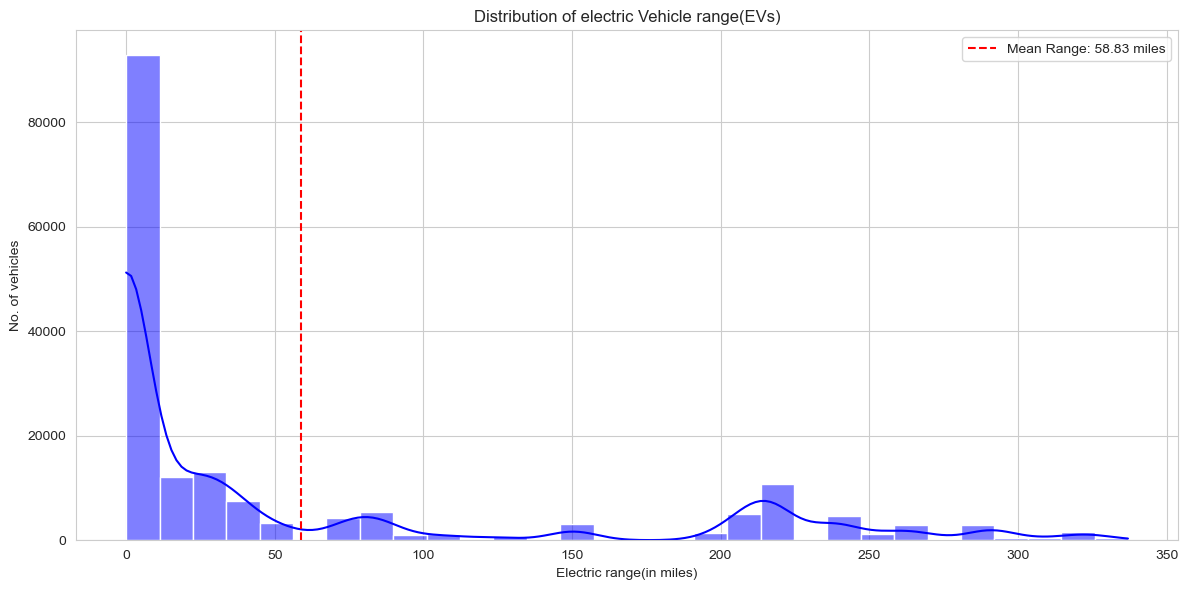

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(ev['Electric Range'], bins=30, kde=True, color='Blue')
plt.title('Distribution of electric Vehicle range(EVs)')
plt.xlabel('Electric range(in miles)')
plt.ylabel('No. of vehicles')
plt.tight_layout()
plt.axvline(ev['Electric Range'].mean(), color='red', linestyle='--', label= f'Mean Range: {ev['Electric Range'].mean():.2f} miles')
plt.legend()

## Observation
- High frequency of Electric vehicles with low eletric Range significantly rise at '< 50 miles'
- No. of Vehicles with high electric range is few
- Graph is Rightly skewed as long tail extends towards high electric range Vehicles with less No. of vehicles
- Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean (58 miles)

In [65]:
## Electric range trend over different years

In [67]:
## Average electric range over year
avg_range_yearly = ev.groupby('Model Year')['Electric Range'].mean().reset_index()

In [69]:
avg_range_yearly

,Model Year,Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


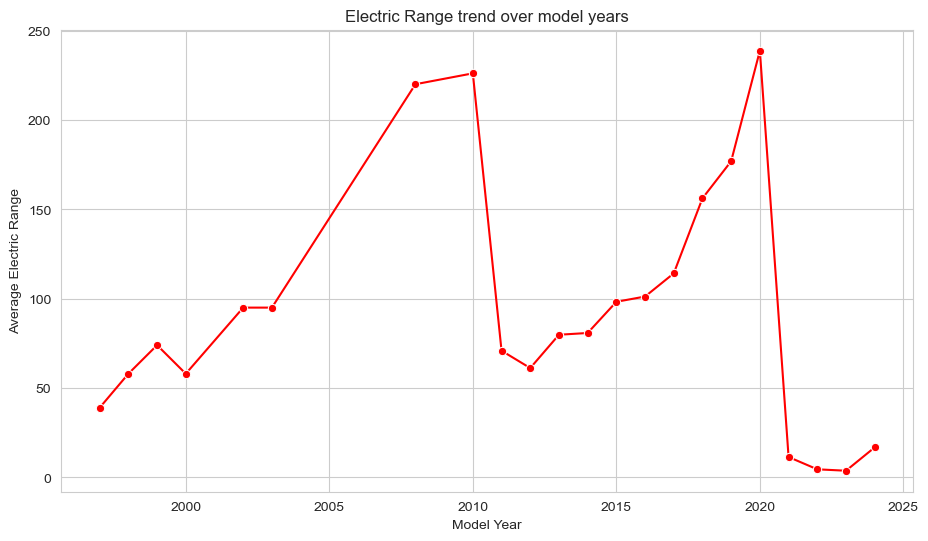

In [85]:
## lET'S PLOT 

plt.figure(figsize=(11,6))
sns.lineplot(x='Model Year', y='Electric Range', data=avg_range_yearly, marker='o', color='red')
plt.title('Electric Range trend over model years')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range')
plt.grid(True)
plt.show()

## Observation
- There is an upward trend in Electric Range over the years which clearly defines that significant improvement in technology of battery.
- As we can see the highest peak is around 2020
- After 2020 electric range might drop and see a slight improvement (upward movement) in recent year.

  -- Overall, Plot shows the upward trend in last 2 decades in electric range and demand has been consistently rising.

In [89]:
## Electric range by top models

In [111]:
## calculation of average electric range over top models or top manufacturers

avg_model_range = top_make.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
avg_model_range = avg_model_range.head(10)

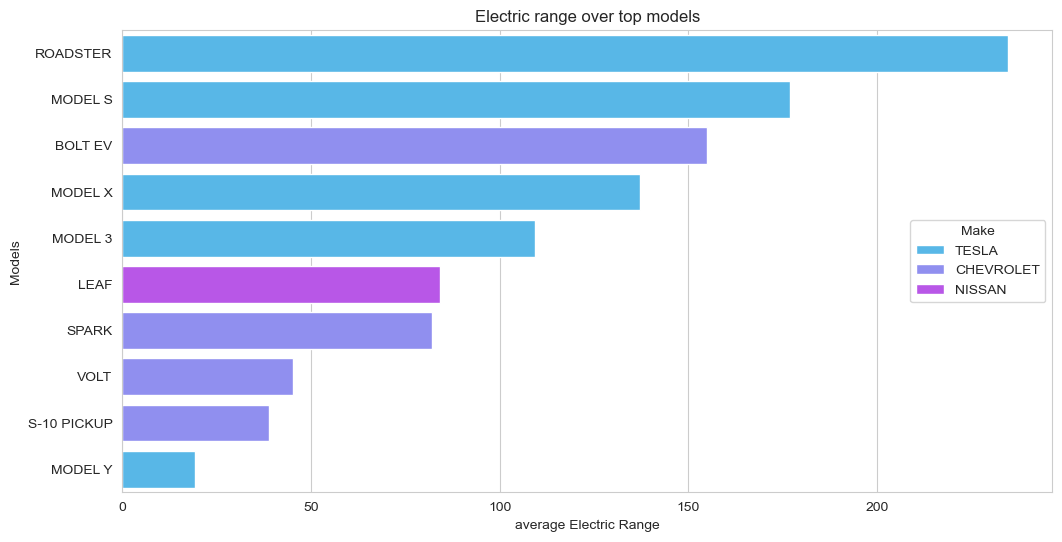

In [115]:
## let' plot

plt.figure(figsize=(12,6))
sns.barplot(x='Electric Range', y='Model', hue='Make',data=avg_model_range, palette='cool')
plt.title('Electric range over top models')
plt.xlabel('average Electric Range')
plt.ylabel('Models')
plt.legend(title='Make', loc='center right')
plt.show()


## Observation
 - Model 'ROADSTER' manufactured by 'TESLA' has highest electric range and it shows the TESLA commitment and dominance in EVs market.
 - Model 'X', '3' of 'TESLA' are also in top electric range list
 - Model'BOLT EV' of chevrolet has high electric range similar to TESLA models.
 - 'NISSAN' models have moderate to low electric range

In [120]:
## ESTIMATION OF MARKET SIZE OF EV'S IN USA

In [122]:
## calculation of EVs registered yearly
ev_count_yearly = ev['Model Year'].value_counts().sort_index()
ev_count_yearly

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

##### -  Here we have to notice one thing that EVs count in 2024 is less as it only contains values till march 
##### - So, now we calculate 2024 total estimated EVs count and 
##### - see the trend and growth potential for next five years also using ML technique

-  We will consider '2023' data as a recent data for projection of EVs count for next 5 years
 --CAGR (compound annual growth rate)
 - CAGR is a finacial metric that describes a constant rate of return over time for an investment business.
 - Like in this case, Companies need predictive model for estimate growth for next 5 years
 - By using CAGR method, Companies will make a decision on How much investment they have to make in EVs production capacity 



#### Calculation of Exponential growth
 forumal = a* np.exp(b*x)

- where a = starting value
- b = growth rate
- x = Time input (yearly/daily/weekly)


In [160]:
## CAGR

from scipy.optimize import curve_fit

## assuming current year = '2023'

filter_yr = ev_count_yearly[ev_count_yearly.index <=2023]

def exp_growth(x, a, b):
    return a*np.exp(b*x)

x_dt = filter_yr.index-filter_yr.index.min()
y_dt = filter_yr.values

params, covariance = curve_fit(exp_growth, x_dt, y_dt)

## function to forecast the number of EVs for 2024 and next 5 years

forecast_yrs = np.arange(2024, 2024+6) - filter_yr.index.min()
forecast_values = exp_growth(forecast_yrs, *params)

forecast_EVs = dict(zip(forecast_yrs+filter_yr.index.min(), forecast_values))


In [162]:
forecast_EVs

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

In [190]:
## let's plot
years = np.arange(filter_yr.index.min(), 2030)
actual_yrs = filter_yr.index
forecast_yrs = np.arange(2024,2030)

actual_values = filter_yr.values
forecast_values = [forecast_EVs[year] for year in forecast_yrs]


In [192]:
years

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029],
      dtype=int64)

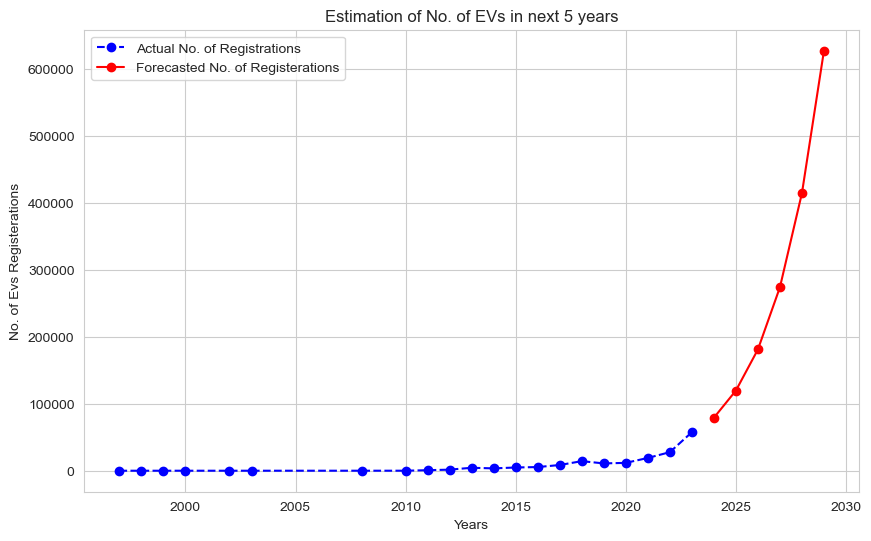

In [196]:
plt.figure(figsize=(10,6))
plt.plot(actual_yrs, actual_values, 'bo--', label = 'Actual No. of Registrations')
plt.plot(forecast_yrs, forecast_values, 'ro-', label = 'Forecasted No. of Registerations')
plt.title('Estimation of No. of EVs in next 5 years')
plt.xlabel('Years')
plt.ylabel('No. of Evs Registerations')
plt.legend()
plt.grid(True)
plt.show()

## Observation
- The number of EVs registeration was low inititally (1997-2010)
- After 2010, EV's market take a upward trend and consitently rising
- After predicting future registerations in EVs , we came to conclusion that EVs market is going to rise in upcoming years
-- From the investment point of view, It will be potential healthy investment for companies.
-- Customer base will likely to grow significantly too

## conclusion
Based on the data analysis and projected growth trends, the electric vehicle (EV) market is poised for significant expansion over the next five years. The forecasted increase in EV registrations highlights a strong upward trajectory, driven by rising consumer adoption, supportive government policies, improvements in charging infrastructure, and technological advancements. The consistent year-on-year growth rate suggests that EVs are rapidly transitioning from a niche segment to a mainstream mode of transportation. This trend underscores a pivotal shift towards sustainable mobility and signals promising opportunities for stakeholders across the EV ecosystem.